In [42]:
import os, yaml

In [43]:
path_to_data = "../../task-dge-perturbation-prediction/resources/"
path_to_results = os.path.join(path_to_data, "runs/run_2024-06-02_22-27-09")

In [44]:
yaml_file = os.path.join(path_to_results, "score_uns.yaml")
with open(yaml_file, 'r') as file:
    data = yaml.safe_load(file.read())

In [46]:
data

[{'dataset_id': 'neurips-2023-data',
  'date_created': '02-06-2024',
  'file_size': 22264,
  'method_id': 'mean_across_compounds',
  'metric_ids': ['mean_rowwise_rmse', 'mean_rowwise_mae'],
  'metric_values': [0.942813, 0.6978648]},
 {'dataset_id': 'neurips-2023-data',
  'date_created': '03-06-2024',
  'file_size': 22264,
  'method_id': 'transformer_ensemble',
  'metric_ids': ['mean_rowwise_rmse', 'mean_rowwise_mae'],
  'metric_values': [0.8973644, 0.6277005]},
 {'dataset_id': 'neurips-2023-data',
  'date_created': '02-06-2024',
  'file_size': 22264,
  'method_id': 'mean_across_celltypes',
  'metric_ids': ['mean_rowwise_pearson',
   'mean_rowwise_spearman',
   'mean_rowwise_cosine'],
  'metric_values': [0.2971518, 0.2805706, 0.3017475]},
 {'dataset_id': 'neurips-2023-data',
  'date_created': '02-06-2024',
  'file_size': 22264,
  'method_id': 'zeros',
  'metric_ids': ['mean_rowwise_rmse', 'mean_rowwise_mae'],
  'metric_values': [0.9179251, 0.6350865]},
 {'dataset_id': 'neurips-2023-data

In [51]:
data

[{'dataset_id': 'neurips-2023-data',
  'date_created': '02-06-2024',
  'file_size': 22264,
  'method_id': 'mean_across_compounds',
  'metric_ids': ['mean_rowwise_rmse', 'mean_rowwise_mae'],
  'metric_values': [0.942813, 0.6978648]},
 {'dataset_id': 'neurips-2023-data',
  'date_created': '03-06-2024',
  'file_size': 22264,
  'method_id': 'transformer_ensemble',
  'metric_ids': ['mean_rowwise_rmse', 'mean_rowwise_mae'],
  'metric_values': [0.8973644, 0.6277005]},
 {'dataset_id': 'neurips-2023-data',
  'date_created': '02-06-2024',
  'file_size': 22264,
  'method_id': 'mean_across_celltypes',
  'metric_ids': ['mean_rowwise_pearson',
   'mean_rowwise_spearman',
   'mean_rowwise_cosine'],
  'metric_values': [0.2971518, 0.2805706, 0.3017475]},
 {'dataset_id': 'neurips-2023-data',
  'date_created': '02-06-2024',
  'file_size': 22264,
  'method_id': 'zeros',
  'metric_ids': ['mean_rowwise_rmse', 'mean_rowwise_mae'],
  'metric_values': [0.9179251, 0.6350865]},
 {'dataset_id': 'neurips-2023-data

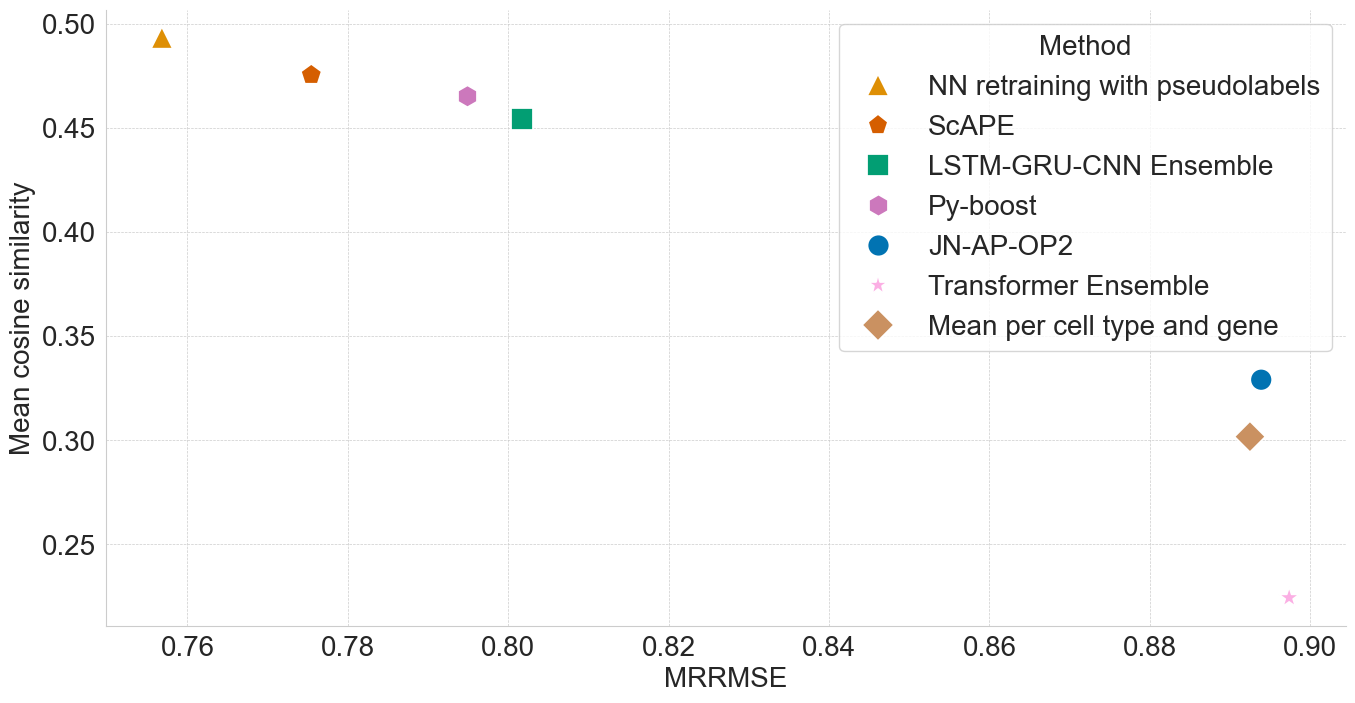

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize a dictionary to collect data
results = {}

# Iterate through the data to extract the required metrics
for entry in data:
    method_id = entry['method_id']
    metrics = entry['metric_ids']
    values = entry['metric_values']

    # Process RMSE and Cosine similarity metrics
    if 'mean_rowwise_rmse' in metrics:
        rmse_index = metrics.index('mean_rowwise_rmse')
        rmse_value = values[rmse_index]
        if method_id not in results:
            results[method_id] = {}
        results[method_id]['RMSE'] = rmse_value

    if 'mean_rowwise_cosine' in metrics:
        cosine_index = metrics.index('mean_rowwise_cosine')
        cosine_value = values[cosine_index]
        if method_id not in results:
            results[method_id] = {}
        results[method_id]['Cosine'] = cosine_value

# Convert the dictionary to a DataFrame for easier manipulation
df = pd.DataFrame([
    {'method_id': method, 'RMSE': details['RMSE'], 'Cosine': details['Cosine']}
    for method, details in results.items() if 'RMSE' in details and 'Cosine' in details
])

# Rename method IDs to more descriptive names
rename_dict = {
    "lgc_ensemble": "LSTM-GRU-CNN Ensemble",
    "nn_retraining_with_pseudolabels": "NN retraining with pseudolabels",
    "scape": "ScAPE",
    "pyboost": "Py-boost",
    "mean_across_celltypes": "Mean per cell type and gene",
    "transformer_ensemble": "Transformer Ensemble",
    "jn_ap_op2": "JN-AP-OP2"
}
df['method_id'] = df['method_id'].map(rename_dict)

# Set color palette and marker styles
palette = sns.color_palette("colorblind")
colors = {'JN-AP-OP2': 'blue', 'NN retraining with pseudolabels': 'green', "LSTM-GRU-CNN Ensemble": "red", "ScAPE": "orange", "Py-boost": "purple", "Mean per cell type and gene": "black", "Transformer Ensemble": "gray"}
colors = {key: palette[i] for i, key in enumerate(colors.keys())}
markers = {'JN-AP-OP2': 'o', 'NN retraining with pseudolabels': '^', "ScAPE": "p", "Py-boost": "h", "Mean per cell type and gene": "D", "Transformer Ensemble": "*","LSTM-GRU-CNN Ensemble": 's',}


# Plotting
plt.figure(figsize=(16, 8))
sns.set_style("whitegrid")
ax = sns.scatterplot(data=df, x='RMSE', y='Cosine', hue='method_id', style='method_id', palette=colors, markers=markers, s=250)
plt.xlabel('Mean Rowwise RMSE')
plt.ylabel('Mean Cosine Similarity')
plt.title('Comparison of RMSE and Cosine Similarity Across Methods')
# Define your custom order as a list of method names in the desired order
order = ["NN retraining with pseudolabels", "ScAPE", "LSTM-GRU-CNN Ensemble", "Py-boost", "JN-AP-OP2", "Transformer Ensemble", "Mean per cell type and gene"]
handles, labels = ax.get_legend_handles_labels()
# Create a new list of handles for the legend by the desired label order
ordered_handles = [next(handle for label, handle in zip(labels, handles) if label == o) for o in order]

# Create the legend with the ordered handles
ax.legend(ordered_handles, order, title='Method', loc='upper right')
# change y axis label
plt.ylabel('Mean cosine similarity')
plt.xlabel('MRRMSE')
plt.title("")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig("results_cosine_vs_mrrmse.svg", transparent=True)
plt.show()
